In [1]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns  # nice color
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
%matplotlib inline

## Exercise 1

In [2]:
data = pd.read_csv("Live_20210128.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.shape

(7050, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [5]:
data = data.drop(["Column1", "Column2", "Column3", "Column4"], axis=1)
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [6]:
data.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


## Exercise 2

In [7]:
status_id = data["status_id"]

In [8]:
len(pd.unique(status_id))

7050

In [9]:
status_p = data["status_published"]
len(pd.unique(status_p))

6913

In [10]:
status_t = data["status_type"]
len(pd.unique(status_t))

4

In [11]:
data = data.drop(["status_id", "status_published"], axis=1)
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [12]:
keys = pd.unique(status_t)
print(keys)
d = {}
i = 0
for key in keys:
    d[key] = i
    i +=1
print(d)

['video' 'photo' 'link' 'status']
{'video': 0, 'photo': 1, 'link': 2, 'status': 3}


In [13]:
data["status_type"]

0       video
1       photo
2       video
3       photo
4       photo
        ...  
7045    photo
7046    photo
7047    photo
7048    photo
7049    photo
Name: status_type, Length: 7050, dtype: object

In [14]:
new_values = [d[key] for key in data["status_type"]]

In [15]:
data["status_type"] = new_values

In [16]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Exercise 3

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [19]:
data.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

In [20]:
data = pd.DataFrame(scaled_data, columns = data.columns)
data

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


In [21]:
km2 = cluster.KMeans(n_clusters=2).fit(data)

In [29]:
print(len(km2.labels_))

7050


<AxesSubplot: xlabel='status_type', ylabel='num_reactions'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

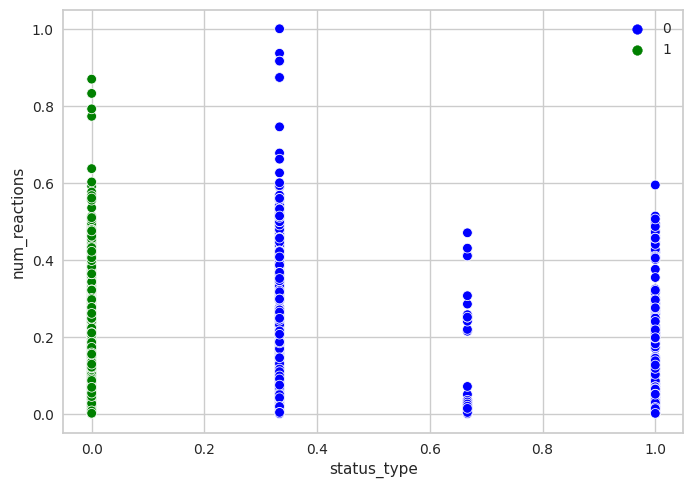

In [38]:
sns.scatterplot(x = data["status_type"],y = data["num_reactions"], hue = km2.labels_, palette = ["blue", "green"])

In [31]:
print(km2.cluster_centers_)

[[ 3.89383658e-01  4.32573576e-02  8.30053166e-04  7.53177689e-04
   4.27174780e-02  2.19015418e-03  2.57503921e-03  1.16151548e-03
   3.12661112e-03  1.40222715e-03]
 [-3.05311332e-15  6.01718890e-02  3.06087732e-02  3.37850317e-02
   5.15956315e-02  5.40947857e-02  8.80632255e-03  1.10523472e-02
   8.11532839e-03  8.19581502e-03]]


In [32]:
print(km2.inertia_)

349.7870239279033


In [40]:
for k in range(1,20):
    km = cluster.KMeans(n_clusters=k).fit(data)
    print(f"* with {k} clusters : inertia = {km.inertia_}")

* with 1 clusters : inertia = 594.698663924613
* with 2 clusters : inertia = 349.7870239279033
* with 3 clusters : inertia = 199.1997075906874
* with 4 clusters : inertia = 120.9262053002312
* with 5 clusters : inertia = 93.95908884549166
* with 6 clusters : inertia = 82.47886064140859
* with 7 clusters : inertia = 73.30537669333805
* with 8 clusters : inertia = 67.85885593632861
* with 9 clusters : inertia = 61.23988927510598
* with 10 clusters : inertia = 56.68096520498301
* with 11 clusters : inertia = 52.005293953974416
* with 12 clusters : inertia = 48.46454823609961
* with 13 clusters : inertia = 44.64651656056619
* with 14 clusters : inertia = 41.38976997099506
* with 15 clusters : inertia = 37.91256791260308
* with 16 clusters : inertia = 34.94826922316718
* with 17 clusters : inertia = 34.77673668085045
* with 18 clusters : inertia = 31.459754007125632
* with 19 clusters : inertia = 29.92910936787088
